In [394]:
import pandas as pd

In [395]:
import numpy as np

In [396]:
import warnings;
warnings.simplefilter('ignore')

In [397]:
df = pd.read_csv('Car details v3.csv')

In [398]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [399]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [400]:
df.shape

(8128, 13)

In [401]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [402]:
dfdropped=df.dropna(inplace=False)

In [403]:
dfdropped.reset_index(drop=True,inplace=True)

In [404]:
dfdropped.shape

(7906, 13)

In [405]:
dfdropped.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
7905,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [406]:
dfdropped.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [407]:
dfdropped["mileage"] = (dfdropped["mileage"]
                     .str.replace("kmpl", "")
                     .str.replace("km/kg", "")
                     .astype(float)
                    )

In [408]:
dfdropped.describe()

,year,selling_price,km_driven,mileage,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


In [409]:
dfdropped["engine"] = (dfdropped["engine"]
                     .str.replace("CC", "")
                     .str.replace(",", "")
                     .astype(int)
                    )

dfdropped["engine"].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: int32

In [410]:
dfdropped.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [411]:
dfdropped["max_power"] = (dfdropped["max_power"]
                     .str.replace("bhp", "")
                     .astype(float)
                    )

In [412]:
dfdropped["torque"] = dfdropped["torque"].str.replace(',', '') 
dfdropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7@ 2700(kgm@ rpm),5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5@ 4500(kgm@ rpm),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24@ 1900-2750(kgm@ rpm),5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0


In [413]:
s = dfdropped["torque"].str.findall(r'[\d\.\d]+')
#n = s.apply(lambda x: '_'.join(i for i in x if int(i)))
s

0              [190, 2000]
1        [250, 1500, 2500]
2             [12.7, 2700]
3       [22.4, 1750, 2750]
4             [11.5, 4500]
               ...        
7901         [113.7, 4000]
7902      [24, 1900, 2750]
7903           [190, 2000]
7904     [140, 1800, 3000]
7905     [140, 1800, 3000]
Name: torque, Length: 7906, dtype: object

In [414]:
l=s.to_list()
l
len(l)

7906

In [415]:
ld = pd.DataFrame(l,columns = ['Column_1','Column2','Column3']) 
ld


,Column_1,Column2,Column3
0,190,2000,None
1,250,1500,2500
2,12.7,2700,None
3,22.4,1750,2750
4,11.5,4500,None
...,...,...,...
7901,113.7,4000,None
7902,24,1900,2750
7903,190,2000,None
7904,140,1800,3000


In [416]:
for i in range(0,7906):
    print(ld["Column_1"][i])

190
250
12.7
22.4
11.5
113.75
7.8
59
170
160
248
78
190
84
115
200
22.4
62
219.7
160
200
190
200
114
115
69
172.5
84
59
200
6.1
114.7
200
60
90
151
104
320
59
250
145
146
115
200
90
343
200
200
200
400
200
138
200
360
200
380
173
400
400
200
111.7
219.6
190
112
115
250
200
90
250
200
200
111.7
190
343
190
130
250
200
205
280
90
104
69
69
99.04
6.1
77
110
99.04
153
90
113.7
190
114
62
219.7
90
200
113
101
115
290
120
151
250
96
360
135
259.8
219.6
173
90
200
115
90
200
259.9
205
190
91
90
62
200
96.1
200
109
400
202
430
347
382
620
400
400
250
500
250
145
173
400
550
200
490
250
177.5
430
170
153
177.5
153
300
130
300
146
113
90
113
360
260
400
213
400
224
130
640
250
112
160
113
90
114.7
59
113
114
95
114
114
114
13.1
205
71
343
115
190
146
78
90
14.9
115
115
117
200
114
200
145
109
77
115
113.7
90
113
69
113
113
320
113.7
190
90
173
109
115
320
62
72
104
200
113.75
69
11.4
140
134
150
104
90
340
240
190
259.9
72
200
330
101
96.1
12.5
330
200
190
110
111.8
190
200
11.8
11.4
113
135.4
2

114
113
200
200
200
111.7
200
200
360
200
200
215
200
160
190
90.3
380
84
84
245
205
219.7
280
57
11.4
109
259.8
250
219.66
200
259.8
200
112
111.8
100
248
11.4
22.4
111.8
62
200
114.7
250
114
330
104
69
77
135.4
12.5
190
111.8
200
160
72
195
90.3
117
114
72
190
96.1
195
84
62
109
109
109
195
74.5
6.1
430
202
430
320
400
213
90
190
110
200
113
132
113
190.24
400
400
110
153
350
200
219.7
247
113
115
190
195
400
85
330
102
172
90
205
96
209
12.7
25.5
25.5
16.3
151
115
219.7
113
113
140
90
74.5
247
113
219.7
200
115
190
190
195
400
160
190
20.4
114
220
200
111.7
113
190
20.4
20.4
20.4
112
215
215
20.4
115
10.4
170
160
259.8
259.8
59
219.7
200
104
190
114.73
200
259.8
420.7
360
215
350
90
259.8
72
360
90
190
330
69
170
200
128
135.4
101
24
190
290
114
290
90
115
114
190
280
180
180
219.6
114
135.4
113
91
140
90
280
343
200
219.7
200
190
180.4
219.7
200
91
114
240
69
250
180.4
160
90
195
102
145
219.7
74.5
69
330
145
320
20.4
330
69
69
135
131
69
74.5
200
74.5
195
190
59
98
219.7
130
195
4

113.75
219.7
290
24
200
250
111.7
113.75
200
150
135
90.3
114
290
74.5
150
114.73
90
90
114.7
160
190
320
259.8
62
250
400
140
190
200
205
340
219.7
113
250
200
300
200
113
20.4
230
250
200
90
190
190
240
59
600
200
90
104
124.5
172.5
190
24
250
12.7
330
160
250
84
190
110
109
101
200
380
113
260
172.5
240
187
215
190
90
219.7
85
20.4
160
190
135
62
62
135.4
84
113.75
219.7
219.7
190
135
259.87
210
132
200
190.24
96.1
62
7.8
36.6
22.4
111.7
330
24
190
205
223
140
160
160
113
327
172.5
248
190
240
12.5
263.7
230
11.5
12.5
12.7
170
22.4
190
215
343
74.5
78
195
74.5
96.1
430
202
430
320
400
213
90
190
110
200
113
132
113
190.24
400
400
110
153
350
190
115
145
200
113
9.8
114
74.5
200
114
106.5
110
140
99.07
420
114.7
219.7
135
160
160
108.5
135
200
113.75
154.9
200
245
180
195
190.25
330
69
200
190
8.5
215
6.1
104
69
62
135
205
170
78
114
200
99
200
114.7
96
90
280
9.8
200
190
259.8
16.3
190
215
135
200
113
111.7
78
113.75
90
195
101
51
90
114
560
8.5
19
290
59
145
200
114
114
190
330
14.

In [417]:
def N_M(value):
    value1=0
    value1=value* 9.80665 
    return value1

In [418]:
for i in range(0,7906):
    #print(ld["Column_1"][i])
    strg=dfdropped["torque"][i]
    valid=strg.find("kgm")
    a=0
    if valid!=-1:
        a=ld["Column_1"][i]
        ld["Column_1"][i]=N_M(float(a))
       
    else:
        ld["Column_1"][i]=ld["Column_1"][i]
print(ld["Column_1"])


0           190
1           250
2       124.544
3       219.669
4       112.776
         ...   
7901      113.7
7902     235.36
7903        190
7904        140
7905        140
Name: Column_1, Length: 7906, dtype: object


In [419]:
for i in range (0,7906):
    if ld["Column3"][i]==None:
        ld["Column2"][i]=ld["Column2"][i]
    else:
        #print(ld["Column2"][i],ld["Column3"][i])
        ld["Column2"][i]=((float(ld["Column2"][i]))+(float(ld["Column3"][i])) )/2

print(ld["Column2"])
                      

0       2000
1       2000
2       2700
3       2250
4       4500
        ... 
7901    4000
7902    2325
7903    2000
7904    2400
7905    2400
Name: Column2, Length: 7906, dtype: object


In [420]:
ld

,Column_1,Column2,Column3
0,190,2000,None
1,250,2000,2500
2,124.544,2700,None
3,219.669,2250,2750
4,112.776,4500,None
...,...,...,...
7901,113.7,4000,None
7902,235.36,2325,2750
7903,190,2000,None
7904,140,2400,3000


In [421]:
dfdropped['torque_NM']=ld['Column_1']
dfdropped['torque_RPM']=ld['Column2']

In [422]:
dfdropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_NM,torque_RPM
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,190,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,250,2000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7@ 2700(kgm@ rpm),5.0,124.544,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,219.669,2250
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5@ 4500(kgm@ rpm),5.0,112.776,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,113.7,4000
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24@ 1900-2750(kgm@ rpm),5.0,235.36,2325
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0,190,2000
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,140,2400


In [423]:
dfdropped.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [424]:
dfdropped.drop(['torque'],axis=1,inplace=True)

In [425]:
final_dataset=dfdropped

In [426]:
final_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500


In [427]:
final_dataset['current_year']=2020

In [428]:
final_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000,2020
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000,2020
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700,2020
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250,2020
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500,2020


In [429]:
final_dataset['no_of_year_used']=final_dataset['current_year']- final_dataset['year']

In [430]:
final_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year,no_of_year_used
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000,2020,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000,2020,6
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700,2020,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250,2020,10
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500,2020,13


In [431]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [432]:
final_dataset.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,current_year,no_of_year_used
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000,2020,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000,2020,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700,2020,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250,2020,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500,2020,13


In [433]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [434]:
final_dataset.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500,13


In [435]:
final_dataset.drop(['name'],axis=1,inplace=True)

In [436]:
final_dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190,2000,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,124.544,2700,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.669,2250,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776,4500,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.7,4000,7
7902,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.36,2325,13
7903,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,190,2000,11
7904,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0,140,2400,7


In [437]:
final_dataset.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,no_of_year_used
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,6.016064
std,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,3.863695
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,0.000000
25%,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,3.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,5.000000
75%,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,8.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,26.000000


In [438]:
final_dataset['torque_NM'].dtype

dtype('O')

In [439]:
final_dataset['torque_NM'] = final_dataset['torque_NM'].astype(float)

In [440]:
final_dataset['torque_RPM'].dtype

dtype('O')

In [441]:
final_dataset['torque_RPM'] = final_dataset['torque_RPM'].astype(float)

In [442]:
final_dataset.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7872.000000,7906.000000
mean,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,180.708777,2886.362862,6.016064
std,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,116.442315,991.217250,3.863695
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,14.900000,1269.350000,0.000000
25%,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,111.795810,2000.000000,3.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,170.000000,2400.000000,5.000000
75%,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,209.000000,4000.000000,8.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,3726.527000,21800.000000,26.000000


In [443]:
final_dataset.corr()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used
selling_price,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617,0.475831,-0.125302,-0.412302
km_driven,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259,0.078361,-0.244635,0.428548
mileage,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700,-0.249212,-0.081578,-0.328544
engine,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103,0.597084,-0.359246,-0.018263
max_power,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999,0.660142,-0.138029,-0.226598
seats,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000,0.283380,-0.302112,0.007923
torque_NM,0.475831,0.078361,-0.249212,0.597084,0.660142,0.283380,1.000000,-0.389316,-0.091899
torque_RPM,-0.125302,-0.244635,-0.081578,-0.359246,-0.138029,-0.302112,-0.389316,1.000000,-0.045872
no_of_year_used,-0.412302,0.428548,-0.328544,-0.018263,-0.226598,0.007923,-0.091899,-0.045872,1.000000


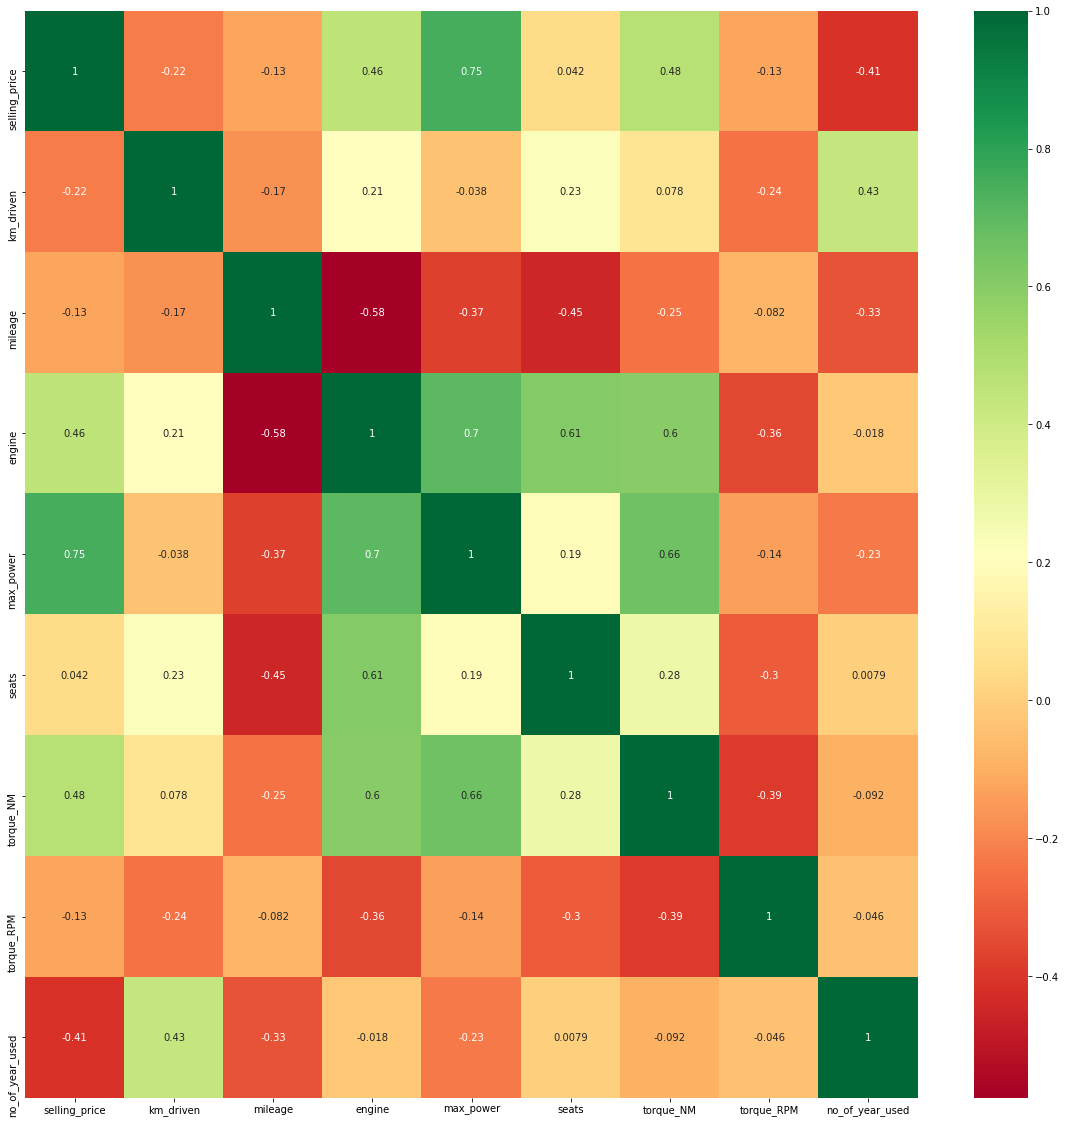

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [445]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [446]:
final_dataset.head()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_NM,torque_RPM,no_of_year_used,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5.0,190.000000,2000.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498,103.52,5.0,250.000000,2000.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497,78.00,5.0,124.544455,2700.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396,90.00,5.0,219.668960,2250.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298,88.20,5.0,112.776475,4500.0,13,0,0,1,1,0,1,0,0,0,0


In [447]:
final_dataset.shape

(7906, 19)

In [ ]:
X=final_dataset.iloc[:,1:13]
y=final_dataset.iloc[:,0]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor() 
model.fit(X,y)

In [ ]:
print(model.feature_importances_)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3,random_state=2020)
clf2 = clf.fit(X_train, y_train)

depth_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2020,shuffle=True)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2020)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)

In [ ]:
predictions=cv.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
import pickle

file = open('decicion_tree_regressor_model.pkl', 'wb')

pickle.dump(cv, file)